In [1]:
!pip install tensorflow

In [2]:
import tensorflow as tf

In [3]:
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential

In [4]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [5]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [6]:
!pip install numpy

In [7]:
import numpy as np

In [8]:
!pip install opencv-python

In [9]:
import cv2

In [10]:
!pip install imghdr

ERROR: Could not find a version that satisfies the requirement imghdr (from versions: none)
ERROR: No matching distribution found for imghdr


In [11]:
import imghdr

In [12]:
!pip install matplotlib

In [13]:
from matplotlib import pyplot as plt

In [14]:
import os

In [15]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [16]:
data_dir = 'train'

In [17]:
image_exts = ['jpeg' , 'jpg' , 'bmp' , 'png']

In [18]:
for image_class in os.listdir(data_dir):
    if image_class == '.DS_Store':
        continue
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in exst list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

In [19]:
data = tf.keras.utils.image_dataset_from_directory('train')

Found 211 files belonging to 2 classes.


In [20]:
data_iterator = data.as_numpy_iterator()

In [21]:
batch = data_iterator.next()

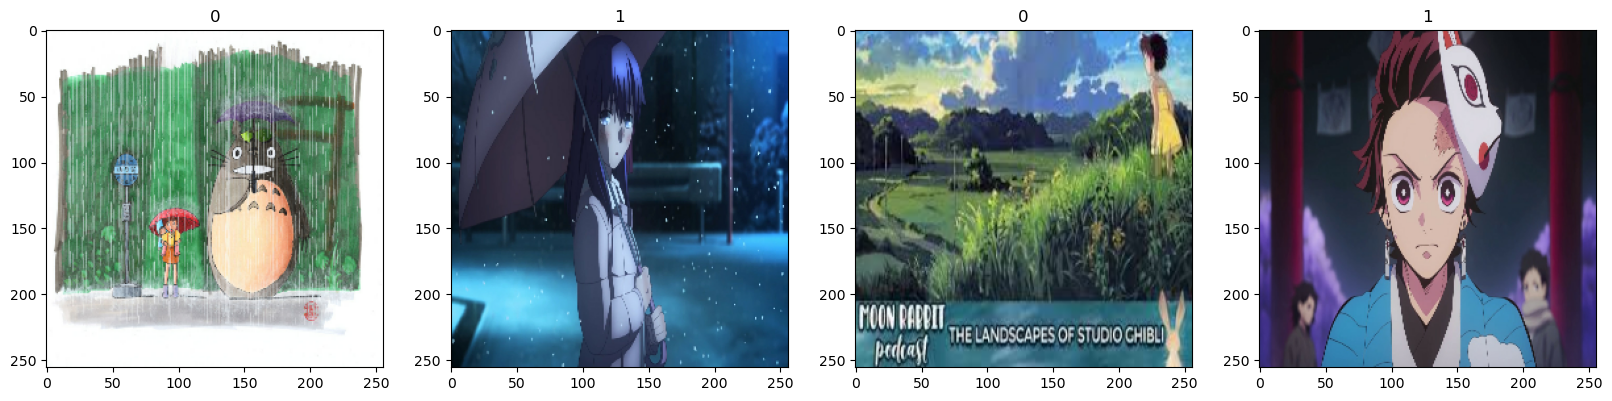

In [22]:
fig,ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [23]:
data = data.map(lambda x, y: (x / 255, y))

In [24]:
train_size = int(len(data) * .7)
val_size = int(len(data) * .2) + 1
test_size = int(len(data) * .1) + 1

In [25]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [26]:
model = Sequential()

In [27]:
model.add(Conv2D(16, (3,3), 1, activation = 'relu', input_shape = (256, 256,3)))
model.add(MaxPooling2D())

In [28]:
model.add(Conv2D(32, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

In [29]:
model.add(Conv2D(16, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

In [30]:
model.add(Flatten())

In [31]:
model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [32]:
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])

In [33]:
logdir = 'logs'

In [34]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [35]:
hist = model.fit(train, epochs=20, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 6s 1s/step - loss: 0.8609 - accuracy: 0.5391 - val_loss: 0.6424 - val_accuracy: 0.5156
Epoch 2/20
4/4 [==============================] - 6s 1s/step - loss: 0.6122 - accuracy: 0.6797 - val_loss: 0.5340 - val_accuracy: 0.8125
Epoch 3/20
4/4 [==============================] - 6s 1s/step - loss: 0.5160 - accuracy: 0.7812 - val_loss: 0.3967 - val_accuracy: 0.8750
Epoch 4/20
4/4 [==============================] - 5s 1s/step - loss: 0.4218 - accuracy: 0.8125 - val_loss: 0.4226 - val_accuracy: 0.8125
Epoch 5/20
4/4 [==============================] - 5s 1s/step - loss: 0.3321 - accuracy: 0.8672 - val_loss: 0.3283 - val_accuracy: 0.8594
Epoch 6/20
4/4 [==============================] - 6s 1s/step - loss: 0.2582 - accuracy: 0.9141 - val_loss: 0.1876 - val_accuracy: 0.9375
Epoch 7/20
4/4 [==============================] - 5s 1s/step - loss: 0.2409 - accuracy: 0.8906 - val_loss: 0.2312 - val_accuracy: 0.9219
Epoch 8/20
4/4 [=========================

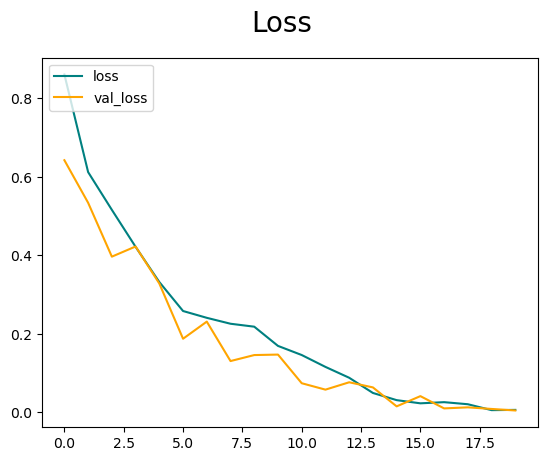

In [36]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

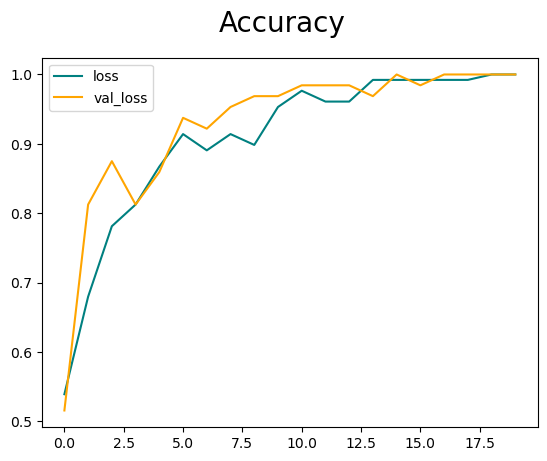

In [37]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'val_loss')
fig.suptitle('Accuracy', fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

In [38]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [39]:
for batch in test.as_numpy_iterator():
    X,y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y,yhat)

1/1 [==============================] - 0s 174ms/step


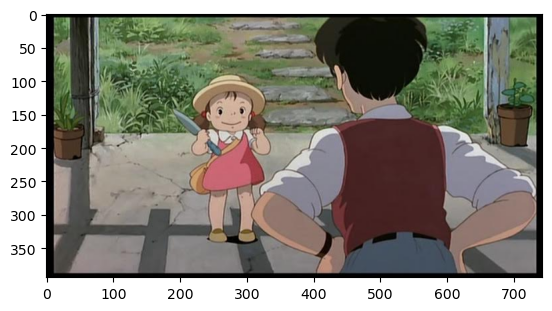

In [47]:
img = cv2.imread('test/ghibli/2.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

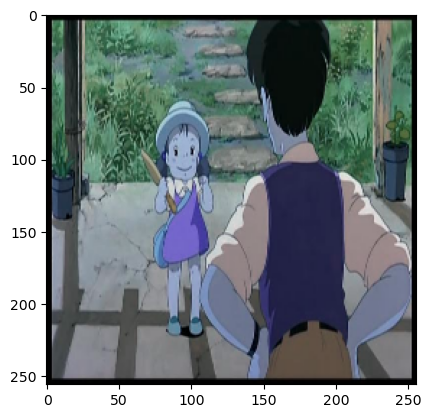

In [48]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [49]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [50]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 26ms/step


In [51]:
if yhat > 0.5:
    print(f'Ufotable')
else:
    print(f'Ghibli')

Ghibli


In [52]:
model.save(os.path.join('model', 'save_file.h5'))